# My First Neural Network

/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_han

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Training data shape: (50000, 32, 32, 3) (50,000 images, 32x32 pixels, 3 color channels)
Test data shape: (10000, 32, 32, 3) (10,000 images)
Class labels: [0 1 2 3 4 5 6 7 8 9] (0=airplane, 1=automobile, ..., 9=truck)


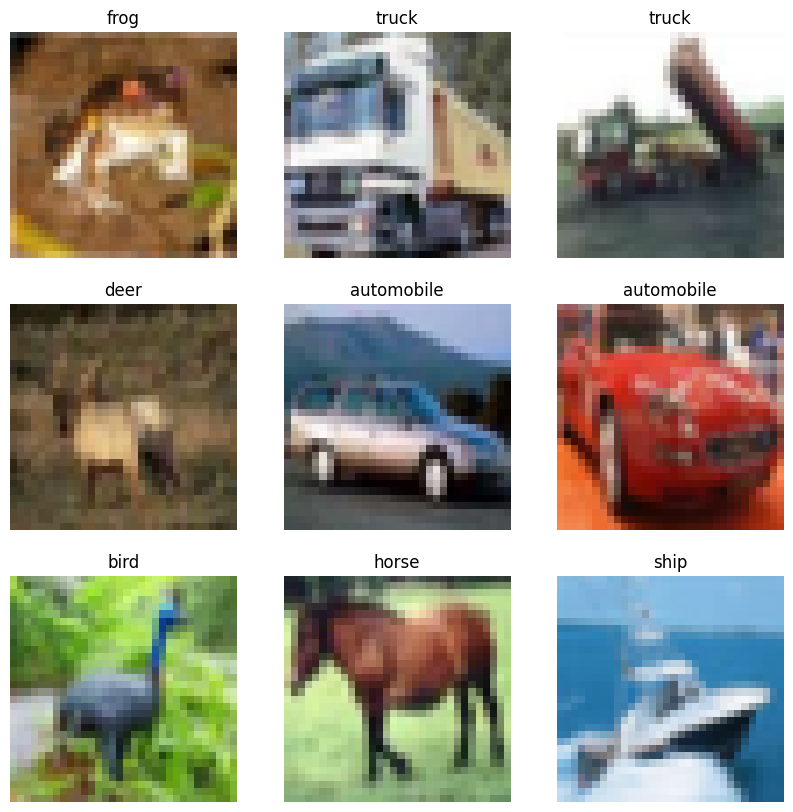

Displayed 9 sample training images above.
Data preprocessing complete. Images normalized, labels one-hot encoded.


/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Model compiled and ready for training.
Starting training. Estimated time: 5-10 minutes total.
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4462 - loss: 1.5452 - val_accuracy: 0.5545 - val_loss: 1.2959
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5771 - loss: 1.2043 - val_accuracy: 0.5884 - val_loss: 1.1659
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6263 - loss: 1.0678 - val_accuracy: 0.6171 - val_loss: 1.1011
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6621 - loss: 0.9779 - val_accuracy: 0.6282 - val_loss: 1.0677
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6844 - loss: 0.9105 - val_accuracy: 0.6573 - val_loss: 1.0187
Training complete! Total time taken: 0.38 minutes.


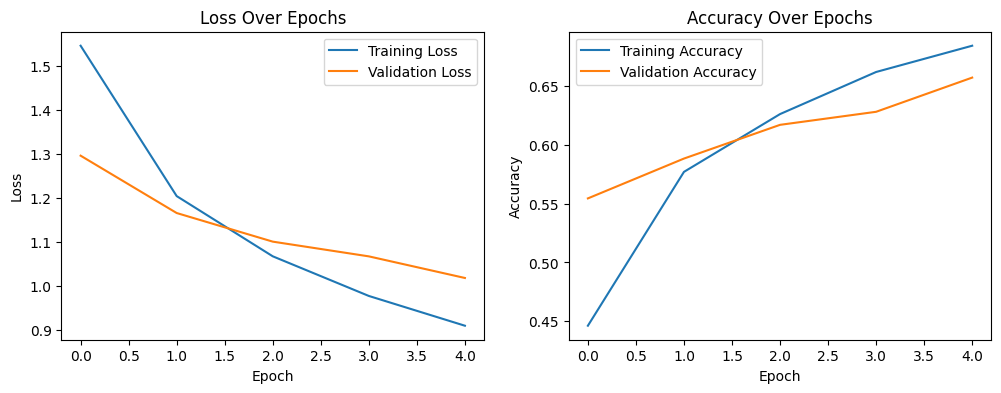

Displayed training history graphs above. Look for decreasing loss and increasing accuracy.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6623 - loss: 1.0066
Test loss: 1.0066, Test accuracy: 0.66 (expect around 0.60-0.70 for this simple model)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


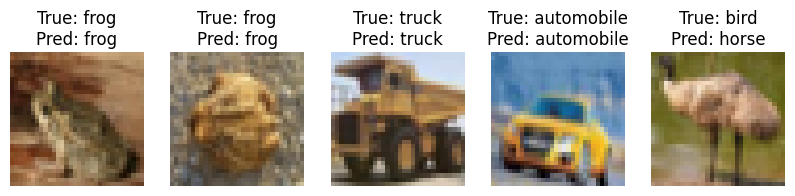

Displayed predictions on 5 test images above. Check if they match!


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import time

# This code uses Keras (with TensorFlow backend) to train a simple neural network on the CIFAR-10 dataset.
# CIFAR-10 is a collection of 60,000 color images (32x32 pixels) in 10 classes (e.g., airplane, car, bird, etc.).
# It's more challenging than MNIST because the images are colorful and varied.
# Since you've never trained a neural network before, I'll add lots of comments to explain each step.
# Your MacBook Pro M3 Pro with 24GB memory should handle this easily. TensorFlow on Apple Silicon uses the GPU automatically for faster training.

# We'll use a simple Convolutional Neural Network (CNN) instead of a plain MLP, as CNNs are better for images.
# They learn patterns like edges and shapes. This is still "simple" but more effective for CIFAR-10.
# Estimated training time: About 1-2 minutes per epoch on your hardware (faster if GPU is utilized), so ~5-10 minutes total for 5 epochs.
# We'll add timing prints to track actual time.

# Step 1: Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Training data shape: {x_train.shape} (50,000 images, 32x32 pixels, 3 color channels)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Class labels: {np.unique(y_train)} (0=airplane, 1=automobile, ..., 9=truck)")

# Step 2: Visualize some sample images to understand the data
# This helps you see what the network is learning from.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
print("Displayed 9 sample training images above.")

# Step 3: Preprocess the data
# Normalize pixel values to 0-1 range (helps the network learn faster).
# Convert labels to one-hot encoding (e.g., class 3 becomes [0,0,0,1,0,0,0,0,0,0]).
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("Data preprocessing complete. Images normalized, labels one-hot encoded.")

# Step 4: Define a simple CNN model
# Input: 32x32x3 images
# Layers: Conv2D (learns filters), MaxPooling (reduces size), Flatten (to 1D), Dense (fully connected).
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),  # 32 filters, 3x3 size
    layers.MaxPooling2D((2, 2)),  # Reduce dimensions by half
    layers.Conv2D(64, (3, 3), activation="relu"),  # More filters for complex patterns
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Flatten to feed into dense layers
    layers.Dense(64, activation="relu"),  # Hidden layer
    layers.Dense(10, activation="softmax")  # Output: 10 classes, softmax for probabilities
])

# Print model summary to see layers and parameters (helps understand the architecture)
model.summary()

# Step 5: Compile the model
# Optimizer: Adam (adjusts learning rate automatically)
# Loss: Categorical crossentropy (for multi-class classification)
# Metrics: Accuracy (percentage correct)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled and ready for training.")

# Step 6: Train the model
# We'll train for 5 epochs (passes over the data). Increase if needed, but start small.
# Batch size 64: Process 64 images at a time.
# Validation split: Use 20% of training data to check progress during training.
# Keras fit() shows a built-in progress bar for each epoch.
print("Starting training. Estimated time: 5-10 minutes total.")
start_time = time.time()  # Track total training time

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

total_time = time.time() - start_time
print(f"Training complete! Total time taken: {total_time / 60:.2f} minutes.")

# Step 7: Plot training graphs to visualize learning
# These show how loss decreases and accuracy increases over epochs.
# Helps understand if the model is improving or overfitting.
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print("Displayed training history graphs above. Look for decreasing loss and increasing accuracy.")

# Step 8: Evaluate on test data
# This tells us how well the model generalizes to unseen images.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f} (expect around 0.60-0.70 for this simple model)")

# Step 9: Make predictions on a few test images to see it in action
# Pick 5 random test images, predict, and show.
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)
samples = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(samples)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()
print("Displayed predictions on 5 test images above. Check if they match!")